# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if response.status_code == 200:
            city_weather = response.json()
            
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | utrik
Processing Record 3 of Set 1 | chinacota
Processing Record 4 of Set 1 | sudak
Processing Record 5 of Set 1 | igarka
Processing Record 6 of Set 1 | haparanda
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | kondoa
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | atafu village
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | hassi messaoud
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | saipan
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | williams lake
Processing Record 18 of Set 1 | anadyr
Processing Record 19 of Set 1 | darchula
Processing Record 20 of Set 1 | chonchi
Processing Record 21 of Set 1 | fortuna
Processing Record 22 of Set 1 | walvis bay
Processing Record 23 of Se

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          613
Lat           613
Lng           613
Max Temp      613
Humidity      613
Cloudiness    613
Wind Speed    613
Country       613
Date          613
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,79.74,70,90,10.54,GQ,1684706241
1,utrik,11.2278,169.8474,82.02,82,68,15.10,MH,1684706241
2,chinacota,7.6073,-72.6011,74.73,98,100,0.36,CO,1684706241
3,sudak,44.8500,34.9667,57.69,95,100,11.52,UA,1684706038
4,igarka,67.4667,86.5833,34.18,98,100,8.90,RU,1684706241


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,79.74,70,90,10.54,GQ,1684706241
1,utrik,11.2278,169.8474,82.02,82,68,15.10,MH,1684706241
2,chinacota,7.6073,-72.6011,74.73,98,100,0.36,CO,1684706241
3,sudak,44.8500,34.9667,57.69,95,100,11.52,UA,1684706038
4,igarka,67.4667,86.5833,34.18,98,100,8.90,RU,1684706241


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

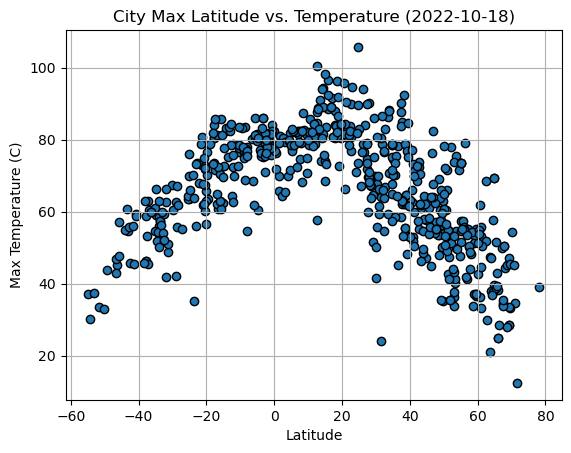

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

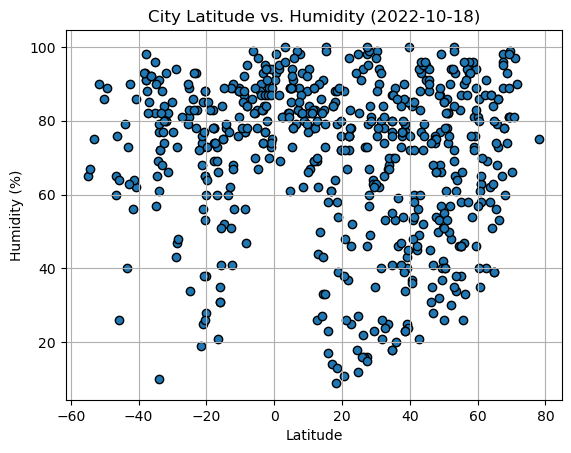

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

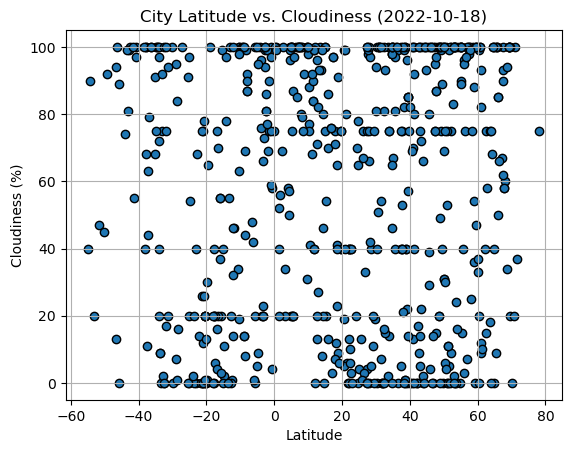

In [18]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

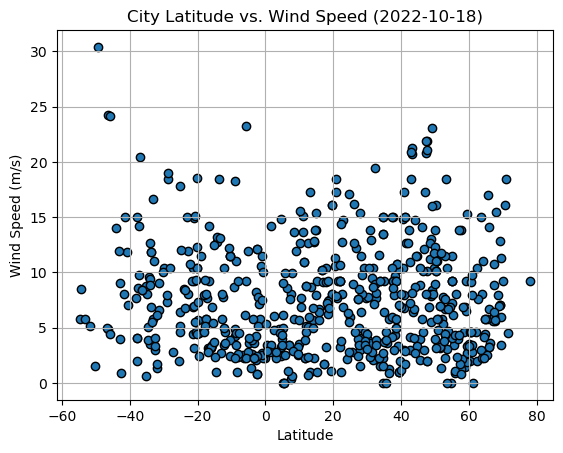

In [19]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create the scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")

    # Annotate the equation of the regression line
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.annotate(line_eq, (min(x_values), min(y_values)), fontsize=12, color="red")

    # Add title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print the r-value
    print(f"The r-value is: {rvalue}")

    # Determine the hemisphere and plot location
    if hemisphere == "northern":
        plot_location = "North"
    elif hemisphere == "southern":
        plot_location = "South"
    else:
        plot_location = "All"

    # Save the figure
    plt.savefig(f"../output_data/{hemisphere}_hemisphere_{plot_location}_linear_regression.png")

    # Show plot
    plt.show()


In [33]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,utrik,11.2278,169.8474,82.02,82,68,15.10,MH,1684706241
2,chinacota,7.6073,-72.6011,74.73,98,100,0.36,CO,1684706241
3,sudak,44.8500,34.9667,57.69,95,100,11.52,UA,1684706038
4,igarka,67.4667,86.5833,34.18,98,100,8.90,RU,1684706241
5,haparanda,65.8355,24.1368,42.85,79,100,6.69,SE,1684706242


In [34]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,79.74,70,90,10.54,GQ,1684706241
7,kondoa,-4.9000,35.7833,60.57,97,9,3.65,TZ,1684706242
8,adamstown,-25.0660,-130.1015,75.92,81,97,17.81,PN,1684706242
9,atafu village,-8.5421,-172.5159,83.39,77,44,11.07,TK,1684705966
10,blackmans bay,-43.0167,147.3167,54.52,73,81,9.04,AU,1684706243


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7673156409043193


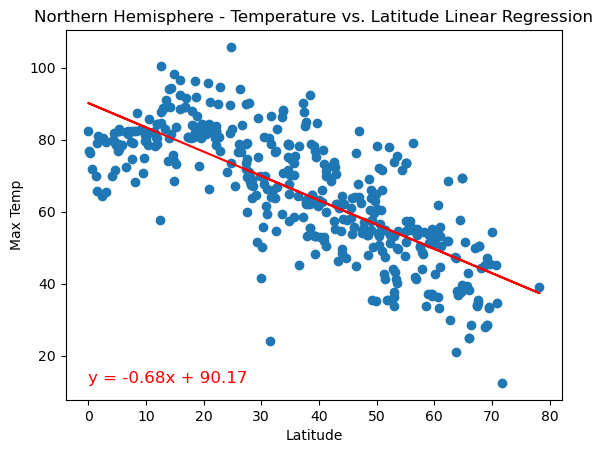

In [42]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere - Temperature vs. Latitude Linear Regression",
                       "Latitude", "Max Temp", "northern")



The r-value is: 0.8227136699782319


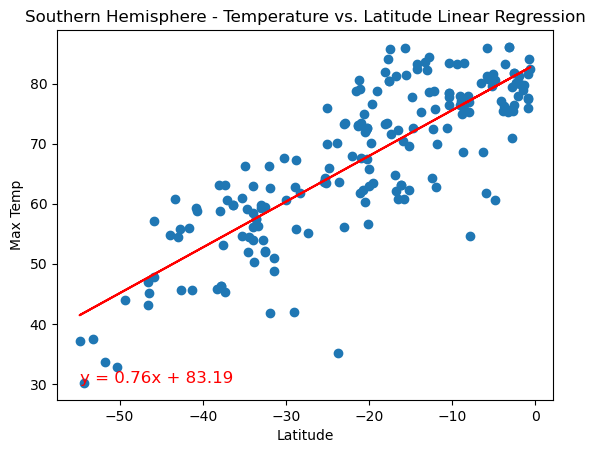

In [43]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere - Temperature vs. Latitude Linear Regression",
                       "Latitude", "Max Temp", "southern")


**Discussion about the linear relationship:** Temperature vs. Latitude:

The linear regression plots show the relationship between temperature and latitude in the Northern Hemisphere and Southern Hemisphere. 

In the Northern Hemisphere, there is a negative linear relationship between temperature and latitude. As latitude increases (moving away from the equator), the maximum temperature decreases. The r-value of -0.767 indicates a moderately strong negative correlation, suggesting that there is a fairly consistent trend of decreasing temperature with increasing latitude in the Northern Hemisphere.

In the Southern Hemisphere, there is a positive linear relationship between temperature and latitude. As latitude increases (moving closer to the equator), the maximum temperature also increases. The r-value of 0.822 indicates a moderately strong positive correlation, suggesting that there is a fairly consistent trend of increasing temperature with increasing latitude in the Southern Hemisphere.

Overall, these linear regression plots demonstrate the general relationship between temperature and latitude in the two hemispheres. They confirm that as we move away from the equator, temperatures tend to decrease in the Northern Hemisphere and increase in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05712245344553104


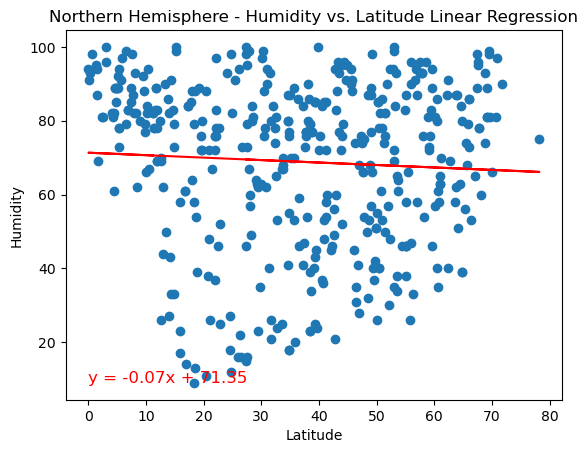

In [44]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity", "northern")


The r-value is: 0.11613949457313356


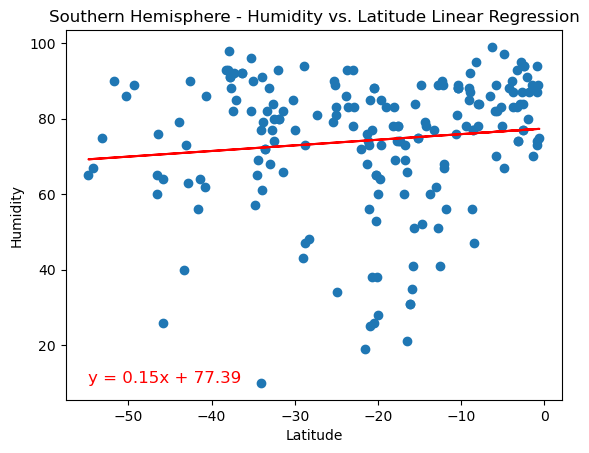

In [45]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                       "Latitude", "Humidity", "southern")


**Discussion about the linear relationship:** 
The linear regression plots show the relationship between humidity and latitude in the Northern Hemisphere and Southern Hemisphere.

In the Northern Hemisphere, there is a very weak negative linear relationship between humidity and latitude. The r-value of -0.057 indicates a nearly negligible correlation. This suggests that there is no consistent trend between humidity and latitude in the Northern Hemisphere.

In the Southern Hemisphere, there is also a very weak positive linear relationship between humidity and latitude. The r-value of 0.116 indicates a very weak correlation. This suggests that there is no consistent trend between humidity and latitude in the Southern Hemisphere either.

Based on these linear regression plots and their respective r-values, it can be concluded that latitude has minimal influence on humidity in both hemispheres. Other factors such as local climate patterns, proximity to bodies of water, and elevation might have a more significant impact on humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.007669043880989511


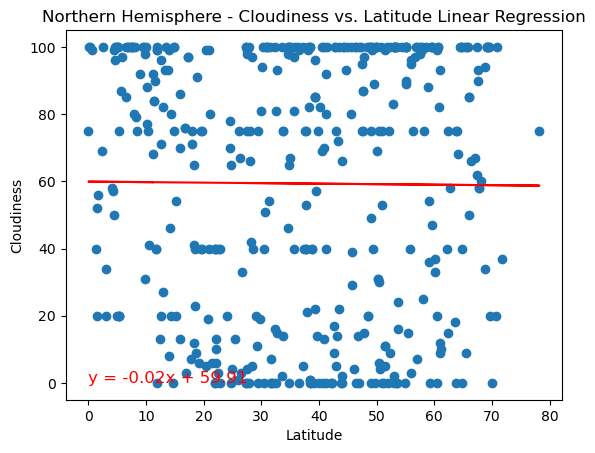

In [46]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness", "northern")



The r-value is: -0.047508796812772196


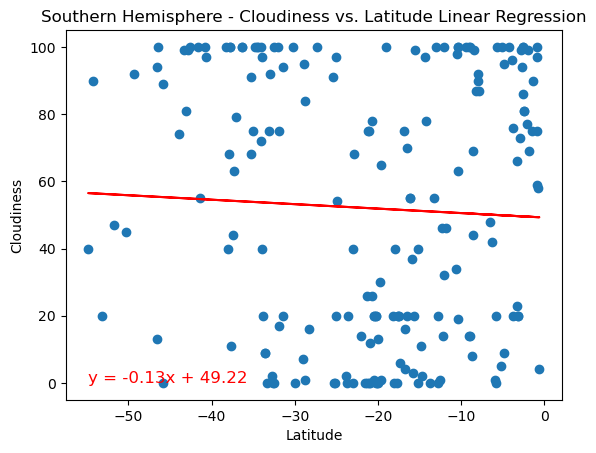

In [47]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                       "Latitude", "Cloudiness", "southern")


**Discussion about the linear relationship:** The linear regression plots show the relationship between cloudiness and latitude in the Northern Hemisphere and Southern Hemisphere.

In the Northern Hemisphere, there is a very weak negative linear relationship between cloudiness and latitude. The r-value of -0.007 indicates an almost negligible correlation. This suggests that there is no significant trend between cloudiness and latitude in the Northern Hemisphere.

Similarly, in the Southern Hemisphere, there is a very weak negative linear relationship between cloudiness and latitude. The r-value of -0.048 also indicates a very weak correlation. This implies that there is no notable trend between cloudiness and latitude in the Southern Hemisphere.

Based on these linear regression plots and their respective r-values, it can be concluded that latitude has minimal influence on cloudiness in both the Northern and Southern Hemispheres. Cloudiness is influenced by various other factors such as atmospheric conditions, wind patterns, and local topography, which may overshadow any direct relationship with latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.059850599984103574


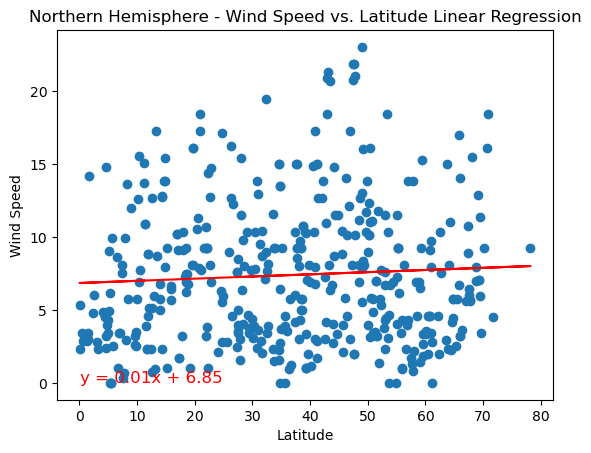

In [48]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed", "northern")


The r-value is: -0.24196722950145222


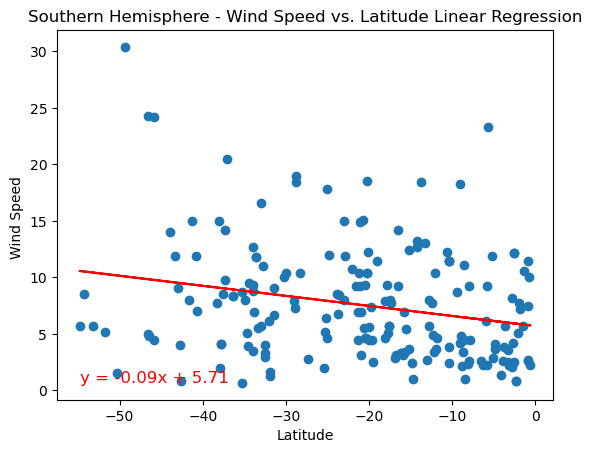

In [49]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed ", "southern")


**Discussion about the linear relationship:** 

The linear regression plots show the relationship between wind speed and latitude in the Northern Hemisphere and Southern Hemisphere.

In the Northern Hemisphere, there is a very weak positive linear relationship between wind speed and latitude. The r-value of 0.060 indicates a very weak correlation. This suggests that there is no significant trend between wind speed and latitude in the Northern Hemisphere.

In the Southern Hemisphere, there is a weak negative linear relationship between wind speed and latitude. The r-value of -0.242 indicates a weak correlation. This suggests that there is a slight tendency for wind speed to decrease slightly as we move closer to the equator in the Southern Hemisphere.

Based on these linear regression plots and their respective r-values, it can be concluded that latitude has a minimal influence on wind speed in both the Northern and Southern Hemispheres. Other factors such as local topography, atmospheric pressure systems, and proximity to large bodies of water may have a more significant impact on wind speed than latitude alone.